## Project 1
- John Serino   
- Math 219
- 10 April 2023


In [2]:
#importing our most commonly used modules
import numpy as np
import pandas as pd
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Preface and Dataset Manipulation

For this assignment I will be using a dataset created by user "TALBOTT" through Kraggle's database.

The set can be found using this link: https://www.kaggle.com/datasets/ttalbitt/american-football-team-stats-1998-2019?select=AmericanFootball98.csv

"TALBOTT"'s dataset looks at the statistics of NFL football teams over the 21 year range of 1999-2019.
In particular I will be looking to see which statistics can be used to best predict which team will win the Superbowl in any given year.

In [7]:
# importing "Talbott's" dataset
football = pd.read_csv("AmericanFootball98.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'AmericanFootball98.csv'

The original dataset does not have a built in target classification, so instead I am appending a new column to the end of the dataset named `Superbowl`.

The new column will assign `0` to teams that did not win the Superbowl, and `1` if the team did win the Superbowl.


In [3]:
# adding an empty column to the csv file
football = football.assign(Superbowl = 0)
# a quick look at the dataset for readers.
football.head(3)

,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg start,opp avg time per drive,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,Superbowl
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,39,191,19.4,17.3,Own 24.8,2:20,5.0,22.8,1.00,0
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,33,178,23.6,12.4,Own 27.7,2:39,5.6,26.2,1.29,0
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,40,189,34.4,10.1,Own 31.4,2:35,5.6,26.7,1.81,0


We will now have fill in the Superbowl column with a `1` to represent each team that one the superbowl, this can be done manually by using the `.at[]` method.

In [4]:
football.at['kan2019','Superbowl'] = 1
football.at['nwe2018','Superbowl'] = 1
football.at['phi2017','Superbowl'] = 1
football.at['nwe2016','Superbowl'] = 1
football.at['den2015','Superbowl'] = 1
football.at['nwe2014','Superbowl'] = 1
football.at['sea2013','Superbowl'] = 1
football.at['rav2012','Superbowl'] = 1
football.at['nyg2011','Superbowl'] = 1
football.at['gnb2010','Superbowl'] = 1
football.at['nor2009','Superbowl'] = 1
football.at['pit2008','Superbowl'] = 1
football.at['nyg2007','Superbowl'] = 1
football.at['clt2006','Superbowl'] = 1
football.at['pit2005','Superbowl'] = 1
football.at['nwe2004','Superbowl'] = 1
football.at['nwe2003','Superbowl'] = 1
football.at['tam2002','Superbowl'] = 1
football.at['nwe2001','Superbowl'] = 1
football.at['rav2000','Superbowl'] = 1
football.at['ram1999','Superbowl'] = 1

# Opening
The title of Superbowl champion is one of the most coveted titles in all of sports, and yet every single year it feels impossible to predict which team will win the big game. This begs the question: is it even possible to predict the winner of the Superbowl?

By using the dataset created by "Talbott", with the newly appended column, I will be attempting to prove that you can. Thankfully, the dataset includes many key statistics that go into basic football analysis. These include `PF` or Points for, `TO` or turnovers, `scoring percentage`, etc. Although not as advanced as one might wish to go, each of these statistics can be assumed to correlate with a team winning the NFL championship.

# Initial Analysis using `Pearson` and `Spearman` coefficients.
We can utilize the Pearson and Spearman methods for computing correlation coefficients to determine which statistics correlate the most with winning the superbowl. Thankfully, we have already imported modules that allow us to call the methods without involving us having to write out the full computation.

We will first analyze the data using the `Pearson` coefficient. We will do so in order to determine the effect that outliers potentially have on the dataset.



In [5]:
#we use the corrwith function to look at how wins correlates to every other statistic
football.corrwith(football['Superbowl'])

wins                          0.229472
losses                       -0.227758
PF                            0.153216
yards                         0.089100
plays                         0.054861
yards/play                    0.086468
TO                           -0.092302
Fumbles Lost                 -0.034850
1st downs                     0.089016
completions                   0.020025
pass attempts                -0.015421
pass yards                    0.073127
pass td                       0.115374
int                          -0.104150
net yards per pass att        0.125881
pass 1st downs                0.052968
Unnamed: 17                   0.083267
rush yards                    0.034120
rush td                       0.055811
rush yards per att           -0.022898
rush 1st downs                0.067676
penalties                    -0.013931
pen yards                     0.018324
pen 1st downs                 0.052445
number drives                -0.017965
score percentage         

We can look at the absolute value of each Pearson coefficient to determine which statistic correlates the most with the `Superbowl` category. The positive coefficients represent direct proportionality, while negative coefficients represent inverse proportionality.

The two stats correlating with winning the superbowl the most are `wins` and `losses`, a predictable outcome as teams are required to have more wins to make the playoffs, and the teams with the most wins and fewest losses usually represents the strongest team in general, and is usually the favorite to win the championship. We should look beyond these two columns, and look at which other underlying statistics correlate the most with an NFL team winning the superbowl.

The next values with highest correlation are `opp PF`, `opp score percentage`, `opp avg points per drive`, `opp net yards per pass att` and `opp turnover percentage` these categories are closely followed by `PF` representing `Points For`.

As we can tell, each of the first five categories depends greatly on a teams' defense, suggesting that a strong defense is a good predicter for determining the eventual victor of the Superbowl. In general, when looking at the coefficients, defensive statistics carry significantly more weight when compared to offensive output, although we can say that scoring on offense is still highly important. This is evident with the 5th greatest coefficient belonging to the `PF` column.

## Spearman coefficient
The Spearman coefficient is a very good way to lessen the effect that outliers might have on a dataset, and we can use these coefficients to potentially build off of our conclusions gathered from the Pearson coefficient while also potentially being able to determine which columns were affected most by outliers.

In [6]:
football.corrwith(football['Superbowl'],method = "spearman",)

wins                          0.229817
losses                       -0.228857
PF                            0.157248
yards                         0.092905
plays                         0.064876
yards/play                    0.082041
TO                           -0.087441
Fumbles Lost                 -0.030561
1st downs                     0.095129
completions                   0.033780
pass attempts                 0.001199
pass yards                    0.075460
pass td                       0.122643
int                          -0.099155
net yards per pass att        0.119032
pass 1st downs                0.061371
Unnamed: 17                   0.091953
rush yards                    0.047296
rush td                       0.071452
rush yards per att           -0.019871
rush 1st downs                0.081486
penalties                    -0.017160
pen yards                     0.002996
pen 1st downs                 0.053603
number drives                -0.003553
score percentage         

We can see that similarly to the `Pearson` analysis, the `wins` column and the `losses` columns easily have the greatest correlation for predicting the winner of the Superbowl. However, after these two columns we see a bit of change in our data. The third most prevalent statistic is `opp PF` and the fourth most is `opp avg points per drive`, going along with our previous evidence that defense is a driving factor in determining who will win the NFL championship game. However, where the data starts slightly from the `Pearson` analysis is that the next most important factor is `PF`, or points scored by the offensive team. Although this column rose up in relevancy once removing outliers, it is still surrounded by a variety of defensive stats such as `opp score percentage`, `opp turnover percentage`, etc. This further proves our initial analysis that defensive ability and statistics are better for determining the eventual Superbowl champion.

## Using KDE graphs to further prove our claims
We can plot the aforementioned columns against the `Superbowl` column, to confirm the higher correlation in their relationships.

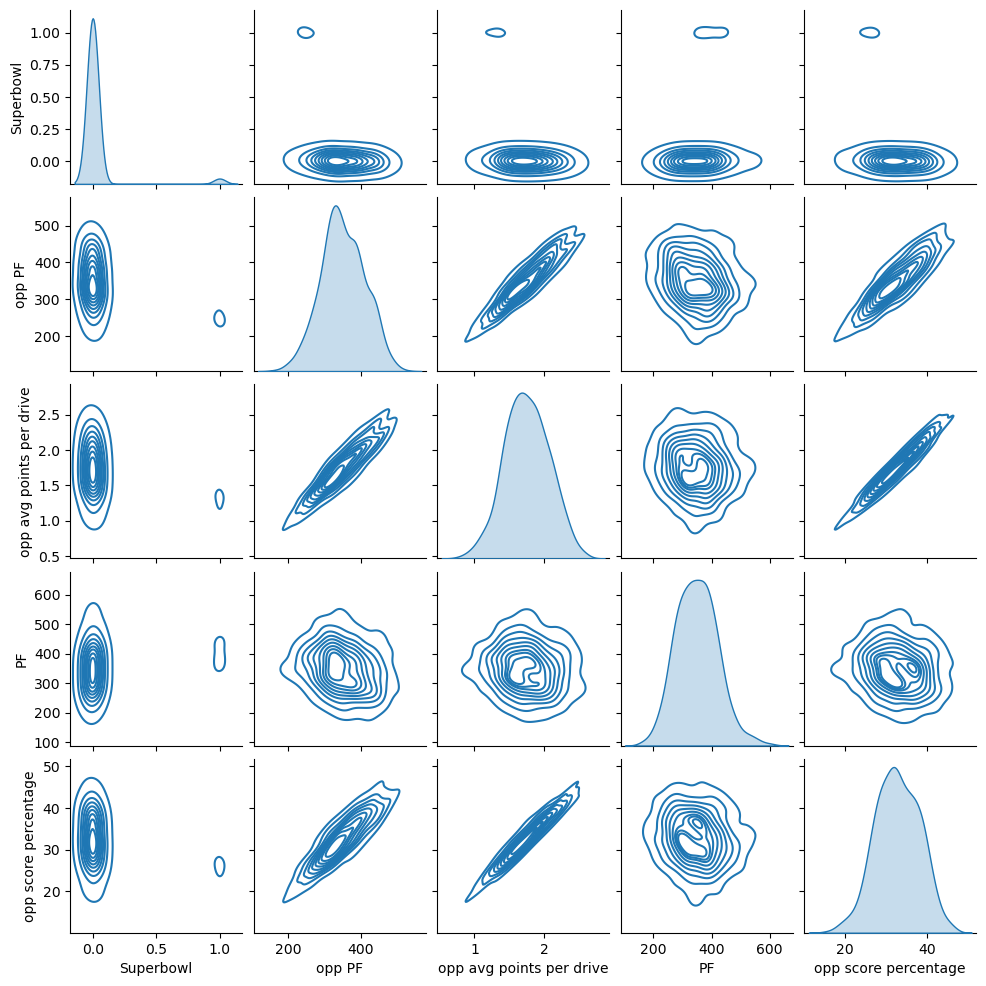

In [7]:
#importing this function in order to get the plots to display
%matplotlib inline
#creating an array to easily display the graphs we want to see using the pairplot function
columns = [ "Superbowl", "opp PF", "opp avg points per drive",
            "PF", "opp score percentage" ]

sns.pairplot(data=football[columns],height=2,kind="kde");

## KDE Graphs Analysis
We specifically want to look at the graphs that have the `Superbowl` column mapped to them. As we can see, there is fairly obvious visual correlation between each of the statistics. We can see that in the `opp PF`, `opp avg points per drive`, and to a lesser extent the `opp score percentage` columns that Superbowl champions have stronger defenses, on average giving up much fewer points than non-champion teams. We can also see that in the `PF` column the average Superbowl champion scores more than league average points in the regular season. 

This analysis further supports the conclusion reached, that the best predictor (that we found) of a Superbowl winning team is a strong regular season defense with an above average offense.

## Final Statistical Thoughts
Through our use of `Pearson` and `Spearman` coefficients as well as our use of graphs, we can see both visually and statistically the columns with the strongest correlation to teams winning the Superbowl. Unsurprisingly, the two columns with highest correlation were the `wins` and `losses` columns as they are a predetermined necessity for a team to even make it to the postseason in the first place. A big takeaway that we can see is how much more important it is to have a strong defense than a strong offense as across the board, defensive metrics outperformed offensive metrics in terms of the Correlation coefficients. This includes statistics such as `opp PF`, `opp TO`, and even to a lesser extent `opp Yards` outperforming the same statistics for the offensive side of the ball. Although it is still critical for a football team to have a strong offense as `PF` or 'Points For' has a strong correlation to teams winning the championship. In conclusion, when looking at which team is likely to win the Superbowl, you are best suited to pick the team with a strong defense that is not held back by a subpar offense.

# Target Classification
We will begin our target classification by dropping the `Superbowl` column as well as various other non-quantitative columns from the chart.

## Training our data
In order to begin target classification, we must create 2 testing sets and 2 training sets to be compared to. We are gonna use 25% of the data, and we will assign the testing sets with a `random_state` value to ensure that the test is reproducible.

In [8]:
# Creating feature frame out of all quantitative values, and dropping 'Superbowl' column
X = football.drop(['Superbowl','avg start','avg time per drive',
                   'opp avg start','opp avg time per drive'],axis = 1)
# Creating classification
y = football['Superbowl']

# Importing modules from sci-kit for working with predicting data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Creating a test set with 25% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
  test_size=0.25,
  shuffle=True,
  random_state=3
)

# Training knn classifier to compute test accuracy
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)    # fit only to train set
acc = knn.score(X_test, y_test)    # score only on test set
print(f"test accuracy is {acc:.1%}")

# Training new variables in order to compute predictor accuracy
n,d = X.shape
# Get vector of predictions for the training set:
yhat = knn.predict(X)    
acc = sum(yhat == y) / n    # fraction of correct predictions
print(f"accuracy is {acc:.1%}")

test accuracy is 97.0%
accuracy is 96.9%


By looking at test accuracy, and prediction accuracy we can ascertain that the model created is fairly accurate, although it is more than likely not perfect, and could potentially be improved.

## Confusion matrix
We can easily look at the data collected from our predictors by using a `confusion matrix`

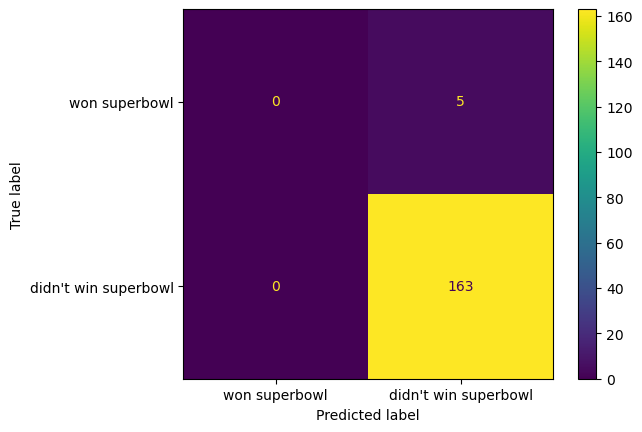

In [9]:
# Import modules from sci-kit necessary for creating and displaying a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

yhat = knn.predict(X_test)
C = confusion_matrix(y_test, yhat, labels=[True, False])
lbl = ["won superbowl","didn't win superbowl"]
ConfusionMatrixDisplay(C,display_labels=lbl).plot()

We can see the 97% accuracy, as we get 163/168 True negative prediction correct. The 5 incorrect predictions were false positives. We can use `recall`, `specificity`, `precision`, and `NPV` to get a more analytic look at the results of our confusion matrix/test.

In [10]:
TP,FN,FP,TN = C.ravel()    # grab the 4 values in the confusion matrix
print( f"recall = {TP/(TP+FN):.1%}" )
print( f"specificity = {TN/(TN+FP):.1%}" )
print( f"precision = {TP/(TP+FP):.1%}" )
print( f"NPV = {TN/(TN+FN):.1%}" )

recall = 0.0%
specificity = 100.0%
precision = nan%
NPV = 97.0%


/var/folders/ws/g1_8w8f50xz0yw6c86pgwqf80000gn/T/ipykernel_62803/1980293548.py:4: RuntimeWarning: invalid value encountered in long_scalars
  print( f"precision = {TP/(TP+FP):.1%}" )


## Confusion matrix & test data analysis
Through the use of the `recall`, `specificity`, `precision`, and `NPV` formulas, we can pretty easily tell that our model is far from perfect. Although the `NPV` and `Specificity` are predicted with high percentage, the same cannot be said for the `Recall` and `precision` formulas.

This begs the question, why?

The reason for this could be because there are no True positive values in the graph, and the reason for this is because the ability for the test to correctly predict a superbowl winner is 21/669, which equates to .031, or 3.1%. And since each prediction is independent from each other, there is a chance that there will be no correct predictions in the testing.


## ROC curve and AUC score
We can continue to determine whether or not our selected `feature` and `target classification` values are good by using their ROC curve, and AUC score.

In [11]:
#We can check probablistically using ROC and curve and AUC score
phat = knn.predict_proba(X_test)
# displaying phat

In [12]:
# Importing necessary module to create roc curve
from sklearn.metrics import roc_curve

# creating variable and for loop to display roc curve
results = []
for i, label in enumerate(knn.classes_):
    actual = (y_test==label)
    fp, tp, theta = roc_curve(actual,phat[:,i])
    results.extend( [(label,fp,tp) for fp,tp in zip(fp,tp)] )
# creating roc table
roc = pd.DataFrame( results, columns=["label","FP rate","TP rate"] )
# printing table of values
roc

,label,FP rate,TP rate
0,0,0.000000,0.000000
1,0,0.600000,0.815951
2,0,1.000000,0.969325
3,0,1.000000,1.000000
4,1,0.000000,0.000000
5,1,0.030675,0.000000
6,1,0.184049,0.400000
7,1,1.000000,1.000000


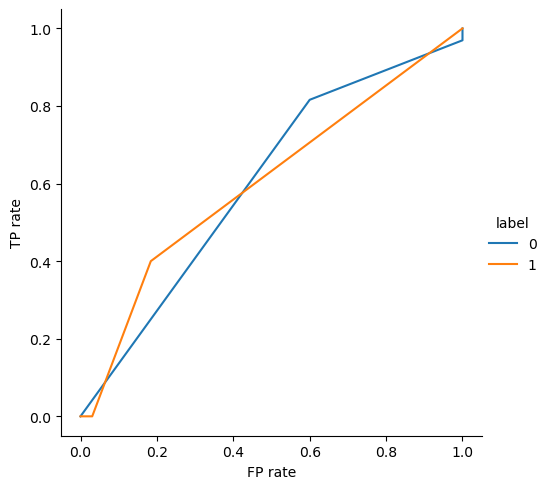

In [13]:
sns.relplot(data=roc, 
    x="FP rate", y="TP rate", 
    hue="label", kind="line", estimator=None
    );

## ROC Curve Analysis

Based on the `ROC` curve alone we can tell that our model is not great as in an ideal world our curves would lie in the top left corner of the plot corresponding to a perfect recall and specificity.




In [14]:
# Importanting necessary modules to compute AUC score
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# training decision tree before computing AUC score
dtree = DecisionTreeClassifier(max_depth = 12,random_state = 302)
dtree.fit(X_train,y_train)

proba = dtree.predict_proba(X_test)

AUC = roc_auc_score(y_test,proba[:,1])


print(f"AUC score is {AUC:.5f}")

AUC score is 0.49693


## AUC score analysis
AUC score's are between 0 and 1, where the closer to 1 you get, the better your model is. Unfortunately this model's AUC score is .49693, being below the .5 mark is extremely poor for a prediction model and further shows how this model could have certainly been improved upon.

# Cross Validation
We can use cross-validation to determine validation scores in order to determine which hyperparameters to retrain on the entire set, and we can test their performance using a test set.

In [15]:
# Import modules necessary for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler


kf = KFold(n_splits=4, shuffle=True, random_state=0)

    

knn = KNeighborsClassifier(n_neighbors=5)
learner = make_pipeline(StandardScaler(), knn)

kf = KFold(n_splits=6, shuffle=True, random_state=18621)
scores = cross_validate(
    learner, 
    X_train, y_train, 
    cv=kf,
    scoring="balanced_accuracy"
    )

print("Validation scores:")
print(scores["test_score"])

Validation scores:
[0.5        0.5        0.5        0.5        0.5        0.49358974]


## K-fold Analysis
The precision of the validation scores suggests that there is not as strong of a dependence on the training set, and that there is not too much overfitting, however it is still concerning that the Validation scores are so far away from the value `1`.

## Stratified K-fold
We can use the Stratified K-fold to also look at the model, and ensure that each class is the same in every fold, similar to the complete training set, and in doing so we will also look at `Hyperparameter tuning`

In [16]:
# Import necessary module to create Stratified K-fold, and then creating it
from sklearn.model_selection import StratifiedKFold

depths = range(4, 16, 1)
kf = StratifiedKFold(n_splits=8, shuffle=True, random_state=2)
results = []    # for keeping results

# Creating decision tree
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    cv = cross_validate(tree, 
        X_train, y_train, 
        cv=kf, 
        scoring="balanced_accuracy",
        n_jobs=-1
        )
    for err in 1 - cv["test_score"]:
      results.append( (d, err) )
    


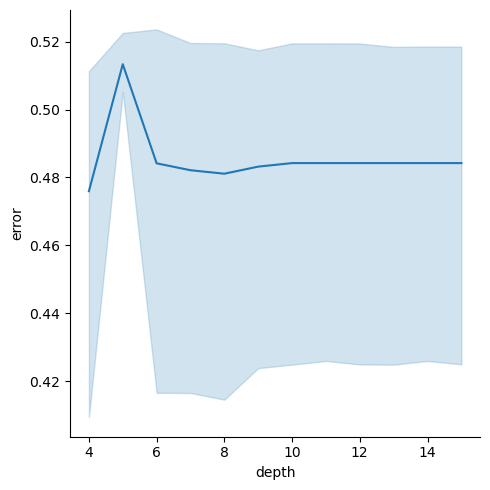

In [17]:
results = pd.DataFrame(results, columns=["depth", "error"] )
sns.relplot(data=results, 
    x="depth", y="error", 
    kind="line"
    );

The error will initially decrease because the shallower decision trees are underfit, it bottoms out at around depth `knn = 8`, after which overfitting will occur. Overall, the error is an undesirably large value over all of the knn values.

In [18]:
results.groupby("depth").mean()

,error
depth,
4,0.475956
5,0.513371
6,0.484170
7,0.482138
8,0.481113
9,0.483197
10,0.484238
11,0.484238
12,0.484238


Now that we have computed the optimal classifier, we can put it to work across the training set and see its performance.

In [19]:
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score

tree = DecisionTreeClassifier(max_depth=9, random_state=1)
tree.fit(X_train, y_train)
yhat = tree.predict(X_test)
print( "score is", balanced_accuracy_score(y_test, yhat) )

score is 0.6938650306748466


## Stratified K-fold and Hyperparameter tuning Analysis
The use of the Stratified K-fold and Hyperparameter tuning can be seen as the accuracy of the model has increase by a pretty significant amount of .2, or a 20% increase from roughly 50% to roughly 70%. Although being highly successful, the new balanced accuracy score is still poor for a predictor model.

# Ensemble Classification
We can use an ensemble method in order to reduce potential variance from overfitting and potentially create a stronger model.

In [20]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
pipe.fit(X_train, y_train)

p_hat = pipe.predict_proba(X_test)
auc = roc_auc_score(y_test==True, p_hat[:,1])   # columns are for [False, True]
print(f"AUC for single classifier is {auc:.4f}")

AUC for single classifier is 0.5724


We first look at the AUC score for a single classifier and note that we get a result that is already a good amount better than the original model with a score of `.6058`, good for roughly an increase of .1, or a `10% increase from 50% to 60%`.


We then utilize the BaggingClassifier method to train 100 classifiers over all different subsets.

In [21]:
from sklearn.ensemble import BaggingClassifier

ensemble = BaggingClassifier( 
    pipe, 
    max_samples=0.75,
    n_estimators=100,
    random_state=18621
    )

ensemble.fit(X_train, y_train);

We can utilize the ensemble object to look at the 5th to last rown of the data set, and then look at the first 6 predictions in that row.

In [22]:
p_hat = ensemble.predict_proba(X_test)
auc = roc_auc_score(y_test==True, p_hat[:,1])   # columns are for [False, True]
print(f"AUC for ensemble is {auc:.4f}")

AUC for ensemble is 0.6650


Once more we can see an improved AUC score as it has once again increased this time a value of roughly .0650 from roughly .6 to roughly .665, a percentage increase of 6%.

In [23]:
ensemble = BaggingClassifier( 
    pipe, 
    max_samples=0.16,
    n_estimators=100,
    random_state=18621
    )

ensemble.fit(X_train, y_train)
p_hat = ensemble.predict_proba(X_test)
auc = roc_auc_score(y_test==True, p_hat[:,1])   # columns are for [False, True]
print(f"AUC for the new ensemble is {auc:.4f}")

AUC for the new ensemble is 0.7969


## Ensemble Analysis
The best possible AUC score for the ensemble is `0.7969`, and can be reached by changing the max_samples size to `.16`. The ensemble scores vary greatly, but can do a good job at creating a model with as much efficiency as possible as it does here, and certainly creates a model that is much better for predicting the eventual Superbowl winner than the original model would.

## Conclusion

We were able to create a viable statistical summary using the `Pearson` and `Spearmen` correlation coefficients as well as a set of graphs to visually display the correlation. We were able to identify which statistics were most important when looking at their correlation to winning the Superbowl.

The classification, however, did not go nearly as well. Even though we computed the model to be accurate, we were able to use the `ROC` curve and the `AUC` method to determine that the model wasn't as effective as it could have been. More than likely this was caused by the fact that the `Superbowl` column only had 2 possible values: 0 (for not being champion), and 1 (for being champion). Beacause of this and the fact that only about 3.1% of the samples held non-zero values in the `Superbowl` column, we received poor `AUC` scores and a poor `ROC` curve. 

For Ensemble fitting, we were able to improve on our initial model, however with a maximum `AUC` score of roughly `.8` or 80%, even the Ensemble method left a little to be desired.

For each of the Classifications, I wish there would have been a better method for prediction of True positives, as the fact that only 21/669 of the samples being marked as non-zero certainly hurt the models.

If I was to do this again, I would have switched the `Superbowl` category with a `playoff` column, displaying with a numeric value how far a team advanced in the playoffs. 0 for not making it, and I would assign numerical values based on how far a team advanced into the playoffs. This certainly would have helped to create a model with better `AUC` scores, as well as better `recall`, `specificity`, `precision`, and `NPV` scores. I would also have tried to quantify the columns that I initially dropped from the `features` set as they could have also helped to create a better model.

Unfortunately this project did not have the outcome that I had initially desired it would have, this can be attributed to things such as my own work, or the dataset, and I definitely wish that I had used a dataset with more advanced statistics, similar to Sabermetric in baseball, but unfortunately this was not the case for this project. I look forward to continuing research into this field utilizing all of the methods that I used in this project.